In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Hourdata.csv')

In [3]:
df.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,...,Season,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,month_year,Rush_Hour and Weak_hour,weather_condition,time_of_day
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,...,Winter,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,...,Winter,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,...,Winter,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,...,Winter,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,...,Winter,4,True,False,False,True,2021-01,Weak Hour,cloudy,Morning


In [4]:
df['time_of_day'] = df['Hour'].apply(lambda value: 'Morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'Afternoon' if value in (12,13,14,15,16)
                                                        else 'Evening' if value in (17,18,19,20,21) 
                                                        else 'Night')

df['time_of_day'] = pd.Categorical(df['time_of_day'],
categories=["Morning","Afternoon","Evening","Night"])

In [5]:
# Total Rides per Month
rides_per_month = df.groupby(['year', 'Month'])['Total_rides'].sum().reset_index()


In [6]:
# Rides by User Type
rides_by_user = df.groupby('Member')['Total_rides'].sum()

In [7]:
# Hourly Usage Patterns
hourly_usage = df.groupby('Hour')['Total_rides'].mean()


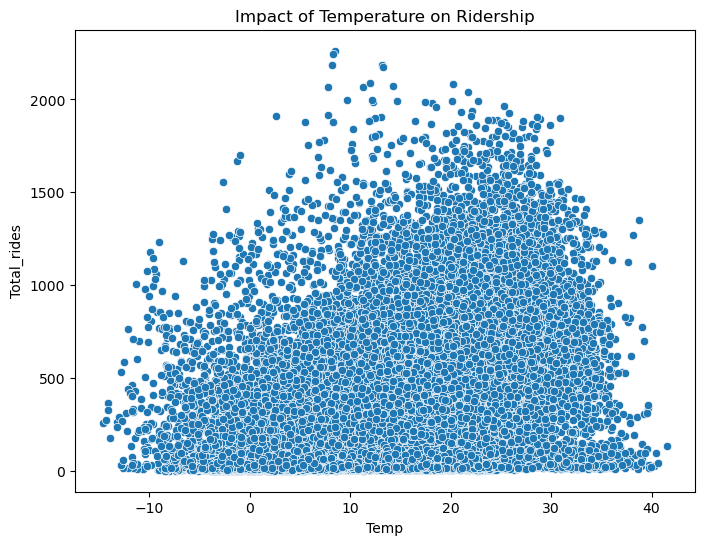

In [8]:
# Impact of Weather (Example: Temperature)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temp', y='Total_rides', data=df)
plt.title('Impact of Temperature on Ridership')
plt.show()


In [9]:
print(rides_per_month)
print(rides_by_user)
print(hourly_usage)

    year      Month    Total_rides
0   2021      April  216763.000000
1   2021     August  271994.000000
2   2021   December  190847.000000
3   2021   February   79540.478511
4   2021    January  100884.191404
5   2021       July  312426.000000
6   2021       June  275380.000000
7   2021      March  171572.095702
8   2021        May  254177.000000
9   2021   November  242057.000000
10  2021    October  328300.000000
11  2021  September  309197.000000
12  2022      April  310435.000000
13  2022     August  377657.000000
14  2022   December  175233.000000
15  2022   February  154317.000000
16  2022    January  110026.095702
17  2022       July  393683.000000
18  2022       June  389656.000000
19  2022      March  254657.095702
20  2022        May  332821.000000
21  2022   November  259717.000000
22  2022    October  333309.000000
23  2022  September  386085.000000
24  2023      April  389243.000000
25  2023     August  470132.000000
26  2023   December  277042.000000
27  2023   February 

<Figure size 1500x700 with 0 Axes>

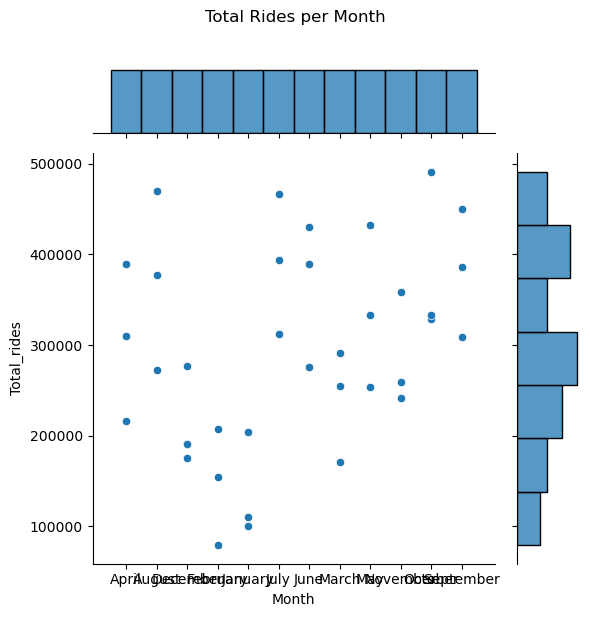

In [10]:
plt.figure(figsize=(15, 7))

# Correct way to use jointplot (using data and specifying x and y)
sns.jointplot(data=rides_per_month, x='Month', y='Total_rides', marker='o')

plt.suptitle('Total Rides per Month', y=1.02) # Better way to set title
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [11]:
# # If 'Month' is a string representation of a month (e.g., "January", "February"), 
# # and you want to ensure correct chronological order on the x-axis:
# month_order = ["January", "February", "March", ...] # Define your desired order
# rides_per_month['Month'] = pd.Categorical(rides_per_month['Month'], categories=month_order, ordered=True)

# sns.jointplot(data=rides_per_month, x='Month', y='Total_rides', marker='o') # Now the order is respected
# plt.suptitle('Total Rides per Month', y=1.02)
# plt.tight_layout()
# plt.show()

In [12]:

# # Alternative using a scatterplot and marginal KDEs (more flexible):
# g = sns.JointGrid(data=rides_per_month, x="Month", y="Total_rides")
# g.plot_joint(sns.scatterplot, marker='o') # Use scatterplot for the joint distribution
# g.plot_marginals(sns.kde) # Use KDE for the marginal distributions

# g.fig.suptitle('Total Rides per Month', y=1.02)
# plt.tight_layout()
# plt.show()

In [13]:
df.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'year', 'day of week',
       'Season', 'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day', 'month_year', 'Rush_Hour and Weak_hour',
       'weather_condition', 'time_of_day'],
      dtype='object')

In [14]:
rides_per_month = df.groupby(['year', 'Month'])['Total_rides'].sum().reset_index()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Select features and target variable

In [ ]:
X = df[['Temp', 'Humidity', 'Windspeed', 'Hour', 'day_of_week', 'Season']] 
y = df['Total_rides'] 

In [ ]:
#prepare the data for mutivariate linear regression
X = bike_hourly_new[['temperature_2m_(°c)', 'relativehumidity_2m_(%)', 'windspeed_10m_(km/h)']]
y = bike_hourly_new['member']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

#make predictions
predictions = model.predict(X_test)